In [2]:
from keras_facenet import FaceNet
from mtcnn.mtcnn import MTCNN
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import confusion_matrix
import cv2
from PIL import Image
import numpy as np

In [2]:
'''ทดสอบว่า yolo ที่แก้ไข กับ ไม่แก้ไข ได้ผลลัพธ์เหมือนกันมั้ย สรุปได้เหมือนกัน'''
with open(r"C:\Users\Raum\Desktop\array_of_frame\2023-09-07_14-56-57_Video_array.npy", 'rb') as f:
    a = np.load(f)

with open(r"C:\Users\Raum\Desktop\array_of_frame\2023-09-11_22-07-40_Video_array.npy", 'rb') as f:
    b = np.load(f)
# a.shape,b.shape
print(cosine_similarity([a],[b]))
print(confusion_matrix(a,b))

((1967,), (1967,))

In [18]:
'''รีไซต์ของภาพแล้วจะสามารถกลับมาเป็นขนาดเดิมได้มั้ย ? ขยายได้แต่แย่ลง'''
test_image = cv2.imread(r'C:\Users\Raum\Desktop\jec\code\dataface\pitha.jpg')
print(test_image.shape)
test_image2 = cv2.resize(test_image,(512,512))
print(test_image2.shape)
test_image3 = cv2.resize(test_image2,(1200,628))
print(test_image3.shape)
cv2.imwrite('new.jpg',test_image3)

(628, 1200, 3)
(512, 512, 3)
(628, 1200, 3)


True

In [1]:
# for i,j in enumerate(a):
#     print(i,j)

In [2]:
embedder = FaceNet()
detector = MTCNN()

[{'box': [107, 54, 27, 40], 'confidence': 0.9832859635353088, 'keypoints': {'left_eye': (113, 68), 'right_eye': (125, 68), 'nose': (117, 76), 'mouth_left': (114, 83), 'mouth_right': (125, 83)}}]


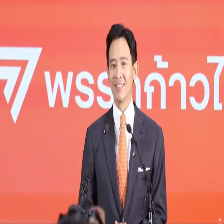

In [12]:
# img = cv2.cvtColor(cv2.imread(r'C:\Users\Raum\Desktop\jec\code\dataface\Pita.jpg'),cv2.COLOR_BGR2RGB)
img = cv2.resize(cv2.cvtColor(cv2.imread(r'C:\Users\Raum\Desktop\jec\code\dataface\Pita.jpg'),cv2.COLOR_BGR2RGB) ,(224,224))
image = Image.fromarray(img)
faces = detector.detect_faces(img)
print(faces)
image 

In [4]:
def extraction_keras_lock(*file_name,show=None):
  if type(file_name) is tuple:
    file_name = [*file_name,]
  result = []
  for i in file_name:
    image = Image.open(i).convert('RGB')
    im_arr = np.array(image)
    N=0
    faces = detector.detect_faces(im_arr)
    x1,y1,width,height = faces[N]['box'] # faces[N]['box']
    x2,y2 = (x1+width),(y1+height)
    face = im_arr[y1:y2,x1:x2] # ตัดเอาเฉพาะใบหน้า
    image_face = Image.fromarray(face)
    image_face= image_face.resize((224,224))
    face_img = np.expand_dims(image_face,axis=0)
    result.append(embedder.embeddings(face_img))

  return result

In [5]:
def extraction_keras_all_cv(im_arr):
    position_crop = []
    embedding_faces = []
    position = []
    faces = detector.detect_faces(im_arr)
    
    if faces == []:
        return [],[]

    for i in faces:
        x1,y1,width,height = i['box']
        x2,y2 = (x1+width),(y1+height)
        position_crop.append([y1,y2,x1,x2])
        position.append([x1,y1,x2,y2])

    # print(len(position_crop))
    for i in position_crop:
        # print(i)
        face = im_arr[i[0]:i[1],i[2]:i[3]]
        image_face = cv2.resize(face,(224,224))
        faces_crops = np.expand_dims(image_face,axis=0)
        embedding_faces.append(embedder.embeddings(faces_crops))
        # print(embedding_faces)
    return embedding_faces,position

In [6]:
image=cv2.imread(r'C:\Users\Raum\Desktop\jec\code\dataface\pitha.jpg')
im_arr = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
embedding_faces,position = extraction_keras_all_cv(im_arr)
xx = extraction_keras_lock(r'C:\Users\Raum\Desktop\jec\code\dataface\Pita.jpg',r'C:\Users\Raum\Desktop\jec\code\dataface\siri.jpg')

In [21]:

log_cosine_similarity = []

Detection_check = np.zeros((len(position)))
for j in range(len(xx)):

    for i in range(len(position)):
        similar = cosine_similarity(xx[j], embedding_faces[i])
        log_cosine_similarity.append(similar)
        if similar>0.55 and Detection_check[i] ==0 :
            Detection_check[i] = 1
            break

for i in range(len(position)):
    if Detection_check[i] == 1:
          pass
    else :
        censor_region = (position[i][0],position[i][1],position[i][2],position[i][3])

        censored_area = image[censor_region[1]:censor_region[3], censor_region[0]:censor_region[2]]

        censored_width, censored_height = censored_area.shape[1], censored_area.shape[0]


        pixel_size = 12
        censored_area = cv2.resize(censored_area, (censored_width // pixel_size, censored_height // pixel_size))
        censored_area = cv2.resize(censored_area, (censored_width, censored_height), interpolation=cv2.INTER_NEAREST)

        image[censor_region[1]:censor_region[3], censor_region[0]:censor_region[2]] = censored_area



[array([[0.7874079]], dtype=float32),
 array([[0.2973188]], dtype=float32),
 array([[-0.03770198]], dtype=float32),
 array([[0.08064354]], dtype=float32),
 array([[0.27171814]], dtype=float32),
 array([[-0.05674545]], dtype=float32),
 array([[0.0596335]], dtype=float32),
 array([[0.05591889]], dtype=float32),
 array([[0.20720986]], dtype=float32),
 array([[0.06897811]], dtype=float32),
 array([[0.7230322]], dtype=float32)]

In [22]:
log_cosine_similarity

[array([[0.7874079]], dtype=float32),
 array([[0.2973188]], dtype=float32),
 array([[-0.03770198]], dtype=float32),
 array([[0.08064354]], dtype=float32),
 array([[0.27171814]], dtype=float32),
 array([[-0.05674545]], dtype=float32),
 array([[0.0596335]], dtype=float32),
 array([[0.05591889]], dtype=float32),
 array([[0.20720986]], dtype=float32),
 array([[0.06897811]], dtype=float32),
 array([[0.7230322]], dtype=float32)]

In [1]:
import cv2
import numpy as np
import time
import threading
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
'''write frame by using multithreads'''
def write_frame(frame,output_filename):
    cv2.imwrite(output_filename, frame)

# video_capture = cv2.VideoCapture(r"C:\Users\Raum\Desktop\jec\code\dataface\normal_day.mp4")
# video_capture = cv2.VideoCapture(r"C:\Users\Raum\Desktop\jec\code\dataface\videoplayback.mp4")
video_capture = cv2.VideoCapture(r"C:\Users\Raum\Desktop\jec\code\dataface\minutes.mp4")
# video_capture = cv2.VideoCapture(r"C:\Users\Raum\Desktop\jec\code\dataface\walk.mp4")
output_directory="C:/Users/Raum/Desktop/array_of_frame/allframe/"
FPS  = int(video_capture.get(cv2.CAP_PROP_FPS ))
WIDTH = int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH))
HEIGHT  = int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
FOURCC  = int(video_capture.get(cv2.CAP_PROP_FOURCC))
TOTAL_FRAMES = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
print(FPS,WIDTH,HEIGHT,FOURCC,TOTAL_FRAMES)
frame_number = 0
threads = []

start = time.time()
while video_capture.isOpened():
    ret, frame = video_capture.read()
    if not ret:
        break

    output_filename = f"{output_directory}frame_{frame_number}.jpg"
    thread = threading.Thread(target=write_frame, args=(frame,output_filename,))
    frame_number += 1
    threads.append(thread)
    thread.start()

for thread in threads:
    thread.join()

image_files = []
path_file ="C:/Users/Raum/Desktop/array_of_frame/allframe/frame_"
for i in range(TOTAL_FRAMES):
    image_files.append(path_file+str(i)+'.jpg')

end = time.time()
print(end - start)
del threads,output_filename,video_capture,thread

24 1920 1080 809062486 1967
11.010048866271973


In [7]:
'''read file from folder for keep images in array  by using multithreads จะใช้หรือไม่ใช้ thread มีค่าเท่าเดิม'''

start = time.time()

def read_image(file_path,index):
    image = cv2.imread(file_path)
    # print(image.shape,'  ',index)
    file_name = "C:/Users/Raum/Desktop/test_only/{}".format(index)
    np.savez_compressed(file_name,image)
print(cv2.VideoWriter_fourcc(*'H265'))
threads = []
# image_all = []
for i,file_path in enumerate(image_files):
    thread = threading.Thread(target=read_image, args=(file_path,i,))
    # read_image(file_path,i,image_all)
    threads.append(thread)
    thread.start()

# Wait for all threads to finish
for thread in threads:
    thread.join()

print("All threads have finished.")
end = time.time()
print(end - start)

# def take_tail(elem):
#     return elem[1]

# image_all.sort(key=take_tail)
# del image_files

892744264
All threads have finished.
24.79949188232422


In [35]:
# write video file
sstrr = time.strftime("%Y-%m-%d_%H-%M-%S")

video_capture = cv2.VideoCapture(r"C:\Users\Raum\Desktop\jec\code\dataface\videoplayback.mp4")
FPS  = int(video_capture.get(cv2.CAP_PROP_FPS))
WIDTH = int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH))
HEIGHT  = int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
FOURCC  = int(video_capture.get(cv2.CAP_PROP_FOURCC))
TOTAL_FRAMES = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
print(FPS,WIDTH,HEIGHT,FOURCC,TOTAL_FRAMES)

fourcc = cv2.VideoWriter_fourcc(*'HEVC')
print(fourcc)
output_path = "C:/Users/Raum/Desktop/writed_video/{}_New_Video.mp4".format(sstrr)
index = 0

out = cv2.VideoWriter(output_path, int(1129727304),FPS,(WIDTH, HEIGHT),isColor=True)


# out.set(cv2.CAP_PROP_BITRATE, 15000)

while video_capture.isOpened():
        ret, frame = video_capture.read()
        if not ret:
            break
        # print(index)
        # index += 1
        # if cv2.waitKey(1) :
        #     break
        out.write(frame)

out.release()
cv2.destroyAllWindows()

24 1920 1080 809062486 1967
1129727304


In [19]:
print(sum([ord(c) << (i * 8) for i, c in enumerate("H265")]))
print(cv2.VideoWriter_fourcc(*'H264'),type(cv2.VideoWriter_fourcc(*'H264')))
print(''.join([chr((892744264 >> (i * 8)) & 0xff) for i in range(4)]))

892744264
875967048 <class 'int'>
H265


In [20]:
from pprint import pprint

def is_fourcc_available(codec):
    try:
        fourcc = cv2.VideoWriter_fourcc(*codec)
        temp_video = cv2.VideoWriter('temp.mp4', fourcc, 30, (640, 480), isColor=True)
        return temp_video.isOpened()
    except:
        return False

def enumerate_fourcc_codecs():
    codecs_to_test = ["DIVX", "XVID", "MJPG", "X264", "WMV1", "WMV2", "FMP4",
                      "mp4v", "avc1", "I420", "IYUV", "mpg1", "H264","H265","HEVC"]
    available_codecs = []
    for codec in codecs_to_test:
        available_codecs.append((codec, is_fourcc_available(codec)))
    return available_codecs

if __name__ == "__main__":
    codecs = enumerate_fourcc_codecs()
    print("Available FourCC codecs:")
    pprint(codecs)

Available FourCC codecs:
[('DIVX', True),
 ('XVID', True),
 ('MJPG', True),
 ('X264', True),
 ('WMV1', True),
 ('WMV2', True),
 ('FMP4', True),
 ('mp4v', True),
 ('avc1', True),
 ('I420', True),
 ('IYUV', True),
 ('mpg1', True),
 ('H264', True),
 ('H265', True),
 ('HEVC', False)]


In [15]:
video_capture = cv2.VideoCapture(r"C:\Users\Raum\Desktop\writed_video\video2023-08-27_15-40-47.mov")
output_directory="C:/Users/Raum/Desktop/array_of_frame/allframe/"
FPS  = int(video_capture.get(cv2.CAP_PROP_FPS ))
WIDTH = int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH))
HEIGHT  = int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
FOURCC  = int(video_capture.get(cv2.CAP_PROP_FOURCC))
TOTAL_FRAMES = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
print(FPS,WIDTH,HEIGHT,FOURCC,TOTAL_FRAMES)
# 875967080
# 875967080 
# 875967080
# 875967080

30 1920 1080 877677894 1967


875967080

In [29]:
i1 = cv2.resize(cv2.imread(f'C:/Users/Raum/Desktop/array_of_frame/allframe/frame_{str(35423)}.jpg'),(512,512)).reshape(-1)
i2 = cv2.resize(cv2.imread(f'C:/Users/Raum/Desktop/array_of_frame/allframe/frame_{str(36168)}.jpg'),(512,512)).reshape(-1)
cosine_similarity([[0,0]],[[0,0]])

array([[0.]])

In [10]:


output_directory="C:/Users/Raum/Desktop/array_of_frame/allframe/"
print(TOTAL_FRAMES)
MASK_FRAMES = np.zeros(TOTAL_FRAMES,dtype=np.int32)

pos_frame = 0
file_path = 'C:/Users/Raum/Desktop/array_of_frame/allframe'

''' pull image from folder '''
frame_maker = cv2.resize(cv2.imread(f'C:/Users/Raum/Desktop/array_of_frame/allframe/frame_{str(0)}.jpg'),(512,512)).reshape(-1)
print(frame_maker.shape)
start = time.time()
for i in range(TOTAL_FRAMES):
  frame = cv2.resize(cv2.imread(f'C:/Users/Raum/Desktop/array_of_frame/allframe/frame_{str(i)}.jpg'),(512,512)).reshape(-1)
  if cosine_similarity([frame_maker],[frame])[0,0]== 0.0:
    # print(cosine_similarity([frame_maker],[frame])[0,0])
    continue
  elif cosine_similarity([frame_maker],[frame])[0,0]>= 0.8:
    MASK_FRAMES[i]=pos_frame
  else :
    frame_maker = cv2.resize(cv2.imread(f'C:/Users/Raum/Desktop/array_of_frame/allframe/frame_{str(i)}.jpg'),(512,512)).reshape(-1)
    pos_frame +=1
    MASK_FRAMES[i]=pos_frame

end = time.time()
print(end-start)

1967
(786432,)
102.78220772743225


In [11]:
for i in range(TOTAL_FRAMES):
    print(i,MASK_FRAMES[i])

0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 0
17 0
18 0
19 0
20 0
21 0
22 0
23 0
24 0
25 0
26 0
27 1
28 1
29 1
30 1
31 1
32 1
33 1
34 1
35 1
36 1
37 1
38 1
39 1
40 1
41 1
42 1
43 1
44 1
45 1
46 1
47 1
48 1
49 1
50 1
51 1
52 1
53 1
54 1
55 1
56 1
57 1
58 1
59 1
60 1
61 1
62 1
63 1
64 1
65 2
66 2
67 2
68 2
69 2
70 2
71 2
72 2
73 2
74 2
75 3
76 3
77 3
78 3
79 3
80 3
81 3
82 3
83 3
84 3
85 4
86 4
87 4
88 4
89 4
90 4
91 4
92 4
93 4
94 4
95 5
96 5
97 5
98 5
99 5
100 5
101 5
102 5
103 5
104 5
105 5
106 5
107 5
108 5
109 5
110 5
111 6
112 6
113 6
114 6
115 6
116 6
117 6
118 6
119 7
120 7
121 7
122 7
123 8
124 8
125 8
126 8
127 9
128 9
129 9
130 9
131 9
132 10
133 11
134 11
135 11
136 11
137 11
138 11
139 11
140 11
141 11
142 11
143 12
144 12
145 12
146 12
147 12
148 12
149 12
150 12
151 12
152 12
153 13
154 13
155 13
156 13
157 13
158 13
159 13
160 13
161 13
162 13
163 13
164 13
165 13
166 13
167 13
168 13
169 13
170 13
171 13
172 13
173 13
174 14
175 14
176 14
177